<a href="https://colab.research.google.com/github/Arjun09061/Intro-to-Data-Analytics/blob/main/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Howework 1

The goal of this homework is make you practice the clustering techniques that you have seen in class.

## Warmup

"…make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding." F.J. Anscombe, 1973.

In [41]:
# you need all of these packages;  if you don't have them, install them
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import networkx as nx
import csv
import numpy as np
import sklearn
# to get the umap package, run 'pip install umap-learn' before executing this notebook
!pip install umap-learn
import umap

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the files ```datasaurus_data.csv``` and ```angled_blob.csv```, and then print their basic statistics (mean, standard deviation, etc.). Is there any difference between these datasets based on these statistics? (It is sufficient to conduct only a visual inspection of the values).

In [42]:
data = pd.read_csv("/content/drive/MyDrive/DS701/GitHub/homework-1-Arjun09061/datasaurus_data.csv", header=None)
data.columns = ['x', 'y']
print(data.describe())
print(data.dtypes)


                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200
x    float64
y    float64
dtype: object


In [43]:
angle = pd.read_csv("/content/drive/MyDrive/DS701/GitHub/homework-1-Arjun09061/angled_blob.csv")
angle.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(angle.describe())
print(angle.dtypes)

                 x            y
count  1000.000000  1000.000000
mean     54.263316    47.832228
std      16.765126    26.935224
min       5.839228   -33.837928
25%      42.823511    28.510799
50%      54.023980    47.712272
75%      65.599345    66.695330
max     117.308793   128.623199
x    float64
y    float64
dtype: object


Through a statistical analysis, we can see that the size of the two datasets is different. Also, angled_blob data contains negative values whereas that's not the case with datasaurus_data.

Now, plot the boxplot for each dataset and compare the distributions between datasets for each feature (compare the $x$ feature across datasets and the $y$ feature across datasets). Are the boxplots **very different**? (Again, it is sufficient to conduct only a visual inspection of the boxplots).

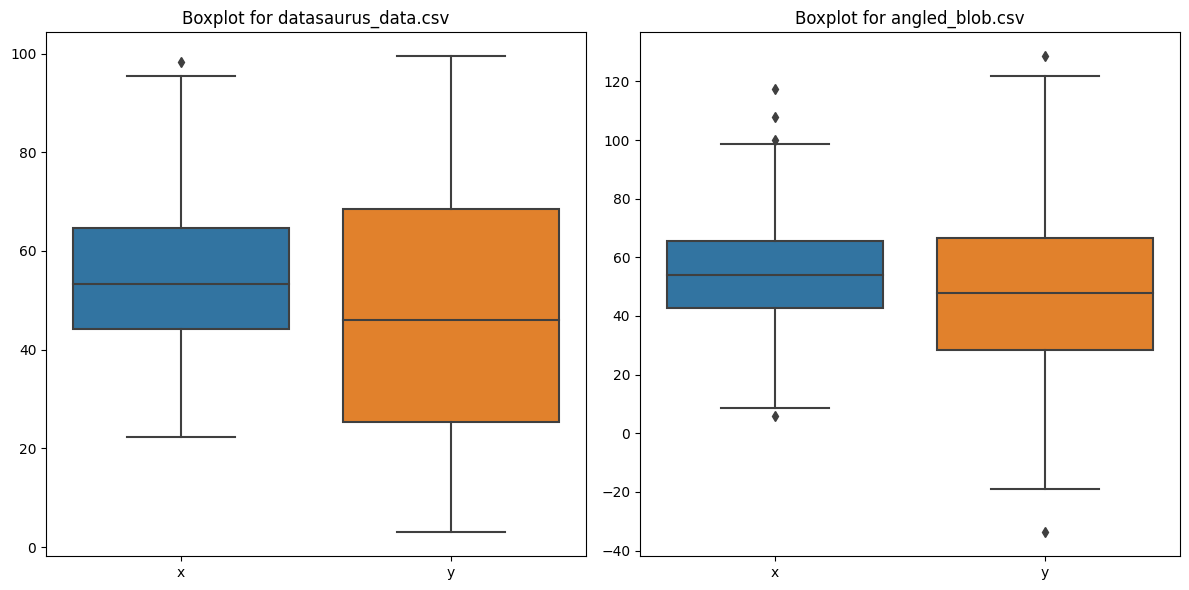

In [44]:
# Create a subplot with two boxplots (one for each dataset)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title('Boxplot for datasaurus_data.csv')

plt.subplot(1, 2, 2)
sns.boxplot(data=angle)
plt.title('Boxplot for angled_blob.csv')

plt.tight_layout()
plt.show()


The boxplots for the two graphs are not very different. We can only see that angled_blob dataset contains few outliers, whereas datasaurus_data contains only 1 outlier.

Now, plot a scatter plot of each dataset and compare them. **Are the datasets different?**

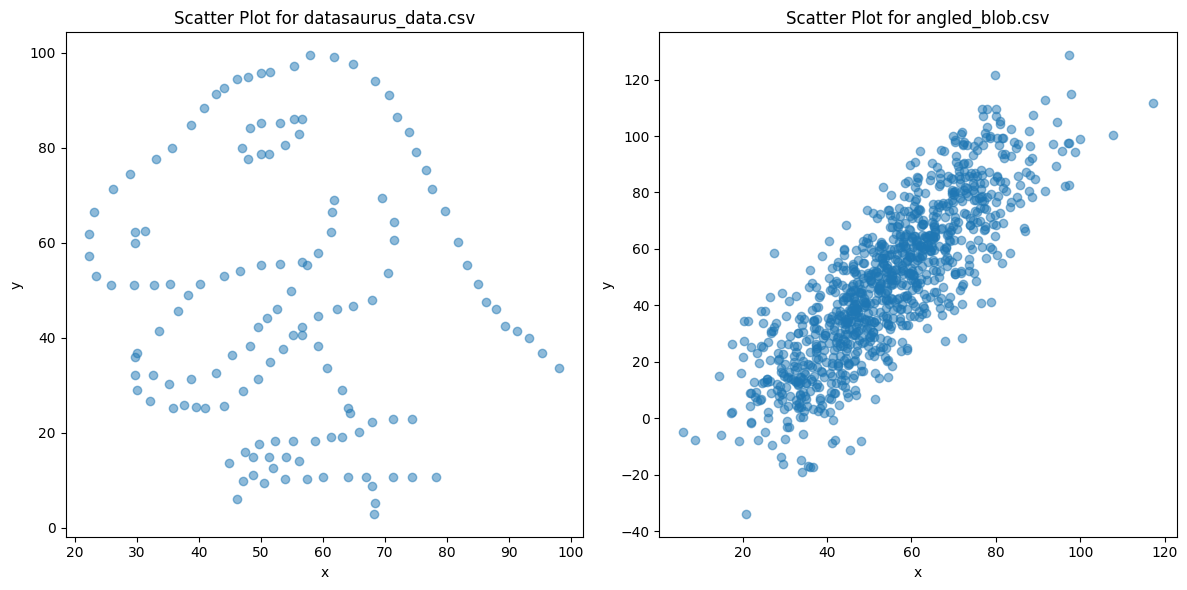

In [45]:
# Create a scatter plot for 'datasaurus_data.csv'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'], alpha=0.5)
plt.title('Scatter Plot for datasaurus_data.csv')
plt.xlabel('x')
plt.ylabel('y')

# Create a scatter plot for 'angled_blob.csv'
plt.subplot(1, 2, 2)
plt.scatter(angle['x'], angle['y'], alpha=0.5)
plt.title('Scatter Plot for angled_blob.csv')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

Through scatter plot analysis and comparison of the two, we can see that they are very different from each other. On one hand, angled_blob dataset has a positive linear relationship, the datasaurus_data has no significant pattern or relationship.

## Part 1

In this part, you will cluster using different algorithms a dataset that has multiple information about individuals.

### Dataset reading and pre-processing

In this part, you will read the dataset and pre-process it. For each step that you do, we expect an explanation about why you did it.

First, read the dataset ```data-processed.csv```

In [46]:
df = pd.read_csv("/content/drive/MyDrive/DS701/GitHub/homework-1-Arjun09061/data-processed.csv")
df.head()


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year
0,47,Local government,43,26,High school graduate,0,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,22,94
1,39,Private,25,26,High school graduate,0,Not in universe,Divorced,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
2,56,Private,41,8,Associates degree-occup /vocational,600,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
3,39,Federal government,50,6,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Public administration,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
4,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


Plot the distribution of ```age```.

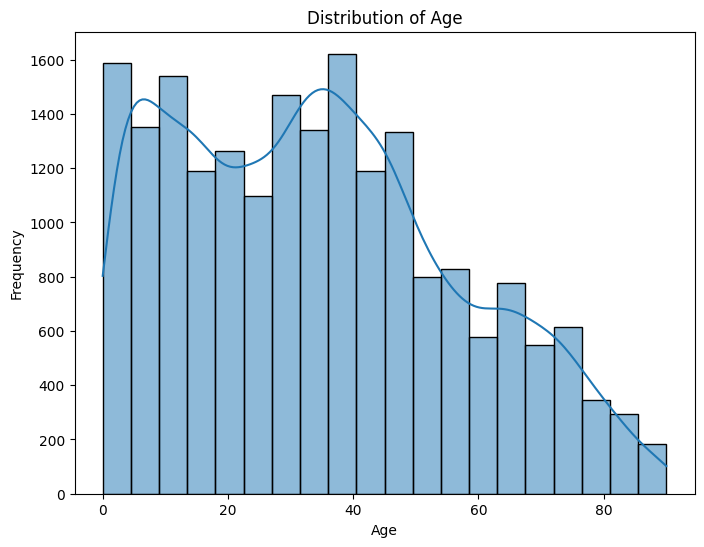

In [47]:
# Plot a histogram of the 'age' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Pre-process the dataset using the techniques that you think are suitable for this dataset.

In [48]:
# Handling Missing Value (if any) and checking the data type of the respected variables.
print(df.isna().sum())
print(df.dtypes)

# Changing a unique value in variable "enroll_in_edu_inst_last_wk"
df['enroll_in_edu_inst_last_wk'] = df['enroll_in_edu_inst_last_wk'].str.strip()
df['enroll_in_edu_inst_last_wk'].replace("Not in universe", "Not in university", inplace=True)



age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Change data type of certain columns
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['weeks_worked_in_year'] = pd.to_numeric(df['weeks_worked_in_year'], errors='coerce')
df['capital_gains'] = pd.to_numeric(df['capital_gains'], errors='coerce')
df['capital_losses'] = pd.to_numeric(df['capital_losses'], errors='coerce')
df['dividends_from_stocks'] = pd.to_numeric(df['dividends_from_stocks'], errors='coerce')
df['num_persons_worked_for_employer'] = pd.to_numeric(df['num_persons_worked_for_employer'], errors='coerce')

# Normalize the Numeric variables
numeric_cols = ['age','wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'weeks_worked_in_year',
                'num_persons_worked_for_employer']

# Create a StandardScaler instance
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify and encode categorical columns as clustering works with numeric data
categorical_columns = ['class_of_worker', 'major_industry_code', 'major_occupation_code', 'education', 'enroll_in_edu_inst_last_wk',
                       'marital_stat', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'detailed_industry_recode',	'detailed_occupation_recode',
                       'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_stat', 'region_of_previous_residence',
                       'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa',
                       'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt',
                       'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
                       "fill_inc_questionnaire_for_veteran's_admin", 'year']

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In pre-processing, the textual or string columns have been categorized through lable encoding. The numeric variables have been standardized.

### Clustering

Given the data pre-processed in the previous step, you will find cluster assigments using different algorithms and analyze them.

#### Find the number of clusters

You first will decide how many clusters you will use. **Show all the steps that you used to decide it and explain your reasoning.**

After choosing the number of clusters, use the same value for all clustering algorithms that you will run. Then, you can compare the results between different algorithms.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

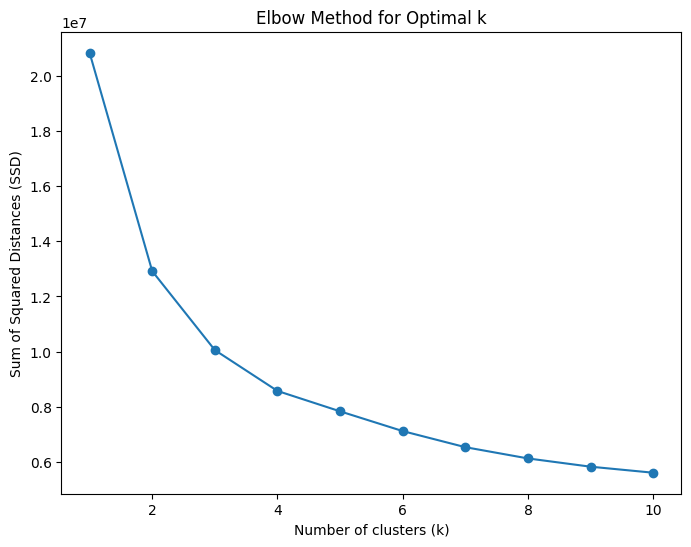

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize a list to store the sum of squared distances (SSD) for different k values
SSD = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    SSD.append(kmeans.inertia_)

# Plot the SSD values for different k values (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_values, SSD, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

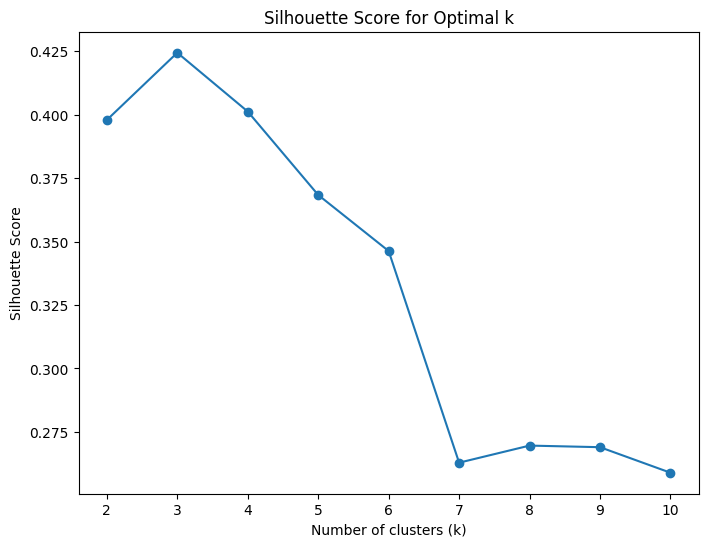

In [51]:
from sklearn.metrics import silhouette_score  # Import silhouette_score
# Range of k values to consider (e.g., from 2 to a maximum number of clusters)
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


Through elbow method and silhoutte score, we can see that silhoutte score starts to increase at cluster number 3. Also, through the elbow method, we can see that at cluster number 3, the SSD starts to level off. So will be choosing 3 as the number of clusters for further analysis.

#### Find and interpret the clusters

Using some algorithms, find the clusters and visualize them. You have to use **at least** $K$-means and Agglomerative Clustering (with different linkage functions).

For the Agglomerative Clustering, you should also plot the dendrogram and inspect it.

To reduce the dimensionality of the dataset to 2 dimensions, we recommend you use the following code:

```py
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
X_reduced = reducer.fit_transform(X)
```

Then, you can use ```X_reduced``` to visualize the clusters in 2-D.

##### $K$-means

Find your clusters using the $K$-means algorithm.

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify the number of clusters (k) you want to find
k = 3

# Dimensionality reduction with UMAP
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
X_reduced = reducer.fit_transform(df)

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_reduced)

# Get cluster labels for each data point
k_means_cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualize the clusters using the X_reduced data.

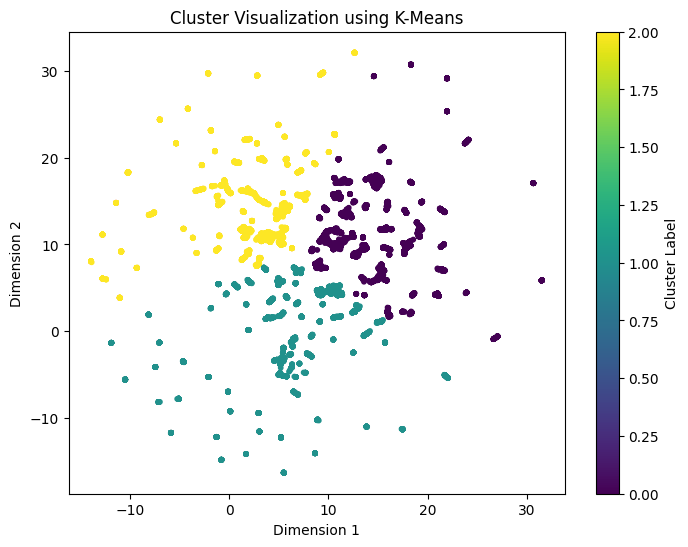

In [53]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = k_means_cluster_labels, cmap='viridis', s=10)
plt.title('Cluster Visualization using K-Means')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


What are the clusters' sizes? Are the sizes similar or too distinct?

The cluster sizes (number of clusters = 3) are almost similar to one another.

##### Agglomerative

Find your clusters with agglomerative clustering.

In [54]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
linkage = 'ward'  # We can choose from 'ward', 'complete', 'average' etc.

# Initialize and fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, compute_distances=True)
agg_cluster.fit(X_reduced)

# Get cluster labels for each data point
agglomerative_cluster_labels = agg_cluster.labels_


The function below plots the dendrogram of an AgglomerativeClustering object.

Its usage is the following:

```
    plot_dendrogram(agg, truncate_mode="lastp", p=n_clusters)
```

where  ```agg``` is the AgglomerativeClustering object and ```n_clusters``` is the number of clusters used.

**P.S.: To use this function, you have to use the parameter ```compute_distances=True``` in the AgglomerativeClustering**

In [55]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Plot the dendrogram the clustering assignment that you found.







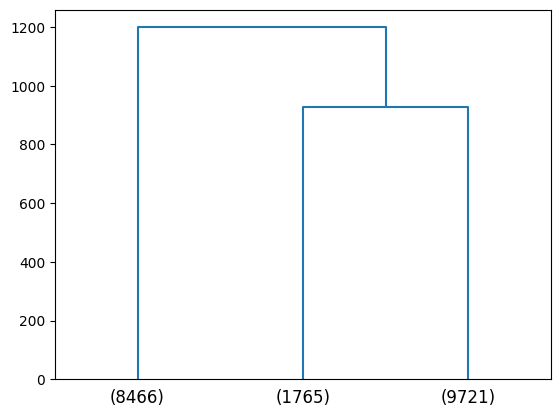

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Plot the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="lastp", p=n_clusters)


The above is the dendogram obtained from agglomerative clustering (number of cluster = 3).

Visualize the clusters using the X_reduced data.

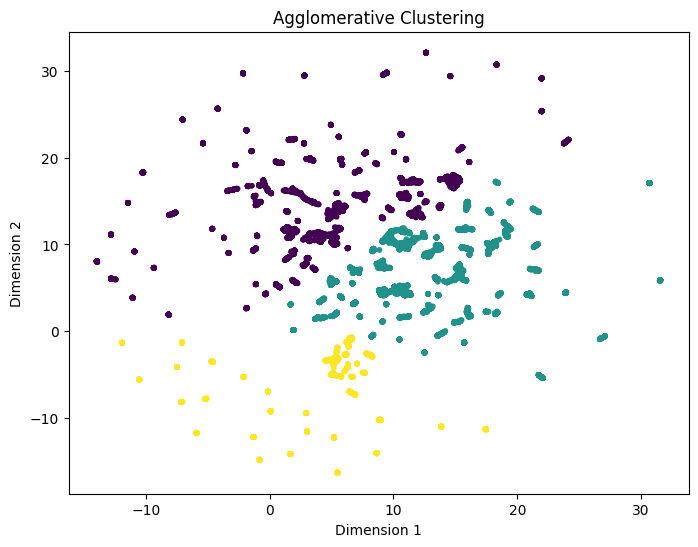

In [57]:
# Visualize the clusters in 2-D
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c= agglomerative_cluster_labels, cmap='viridis', s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Plot the distribution of clusters' sizes. How do the cluster sizes compare to the $k$-means clusters?

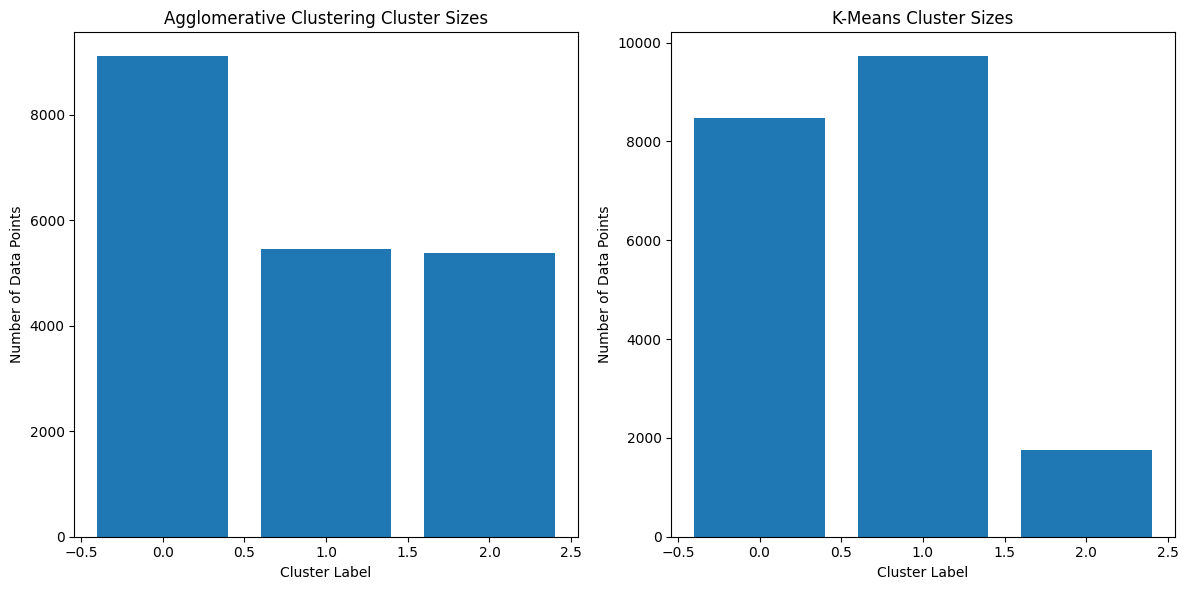

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have cluster_labels for Agglomerative Clustering and kmeans_labels for K-Means

# Calculate the sizes of Agglomerative Clustering clusters
unique_agg_labels, counts_agg = np.unique(k_means_cluster_labels, return_counts=True)

# Calculate the sizes of K-Means clusters
unique_kmeans_labels, counts_kmeans = np.unique(agglomerative_cluster_labels, return_counts=True)

# Create subplots to compare cluster size distributions
plt.figure(figsize=(12, 6))

# Plot the distribution of Agglomerative Clustering cluster sizes
plt.subplot(1, 2, 1)
plt.bar(unique_agg_labels, counts_agg)
plt.title('Agglomerative Clustering Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')

# Plot the distribution of K-Means cluster sizes
plt.subplot(1, 2, 2)
plt.bar(unique_kmeans_labels, counts_kmeans)
plt.title('K-Means Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()


The bars in both subplots have different heights and distributions, it suggests that the two methods do not produce similar results in terms of cluster sizes.



Repeat the steps above for **at least** one more linkage functions (in total, you have to use **at least** two linkage functions).

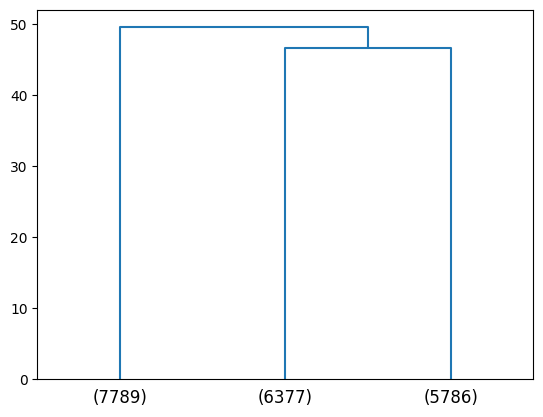

In [59]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
linkage = 'complete'

# Initialize and fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, compute_distances=True)
agg_cluster.fit(X_reduced)

# Get cluster labels for each data point
agglomerative_cluster_labels = agg_cluster.labels_

# Plot the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="lastp", p=n_clusters)


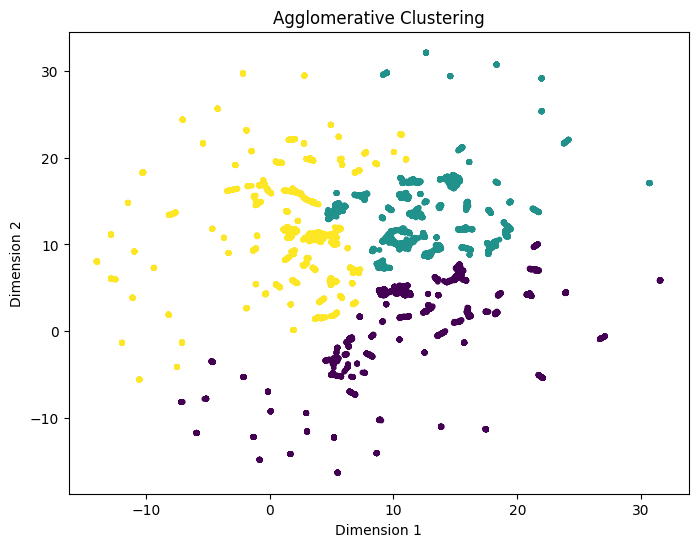

In [60]:
# Visualize the clusters in 2-D
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = agglomerative_cluster_labels, cmap='viridis', s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

#### Questions about the clusters

Answer all the questions providing detailed explanations (you can use extra plots/information to support your answers).

1) Regarding the Agglomerative clustering, is there any difference between the clusters found by the linkage methods you used? If yes, cite at least **one** difference and explain how you can identify it.
2) List **one** difference you found between the $K$-means clustering and Agglomerative clustering (specify the linkage you choose to compare) in the data.

Through Agglomerative clustering (ward), we can see that the clusters tend to be more balanced in size and distribution, with each cluster containing a roughly equal number of data points. On the other hand, with the 'complete' linkage, some clusters are significantly larger than others, resulting in an imbalanced distribution of data points among clusters.

One ***difference*** between k-means K-Means clustering and Agglomerative clustering (using ward method) is that K-means assumed spherical and evenly sized clusters, whereas Agglomerative Clustering with 'ward' linkage adapted to the data's inherent structure, resulting in clusters of varying shapes and sizes that better captured the data distribution.




## Part 2

In this problem, we have a series of probes, which are cities with their respective latitudes and longitudes. We also have the latencies measured between some of those cities.

We can think about this data as a graph. Each city is a node, there is an edge between cities when the RTT (round-trip time) was measured between them. Each edge has a cost, which in this case is the RTT.

### Reading and processing the data

The following code is used to process the data and create a graph. You do not need to modify it.

In [61]:
# The following are in meters and meters per second
radius_earth = 40075016.68557849 / (2 * np.pi)
c = 299792458

def get_sphere_point(latlong):
    """Convert Cartesian coordinates to spherical coordinates."""
    latlong = np.array(latlong) * np.pi / 180.
    return np.array([
        np.cos(latlong[1]) * np.cos(latlong[0]),
        np.sin(latlong[1]) * np.cos(latlong[0]),
        np.sin(latlong[0])
    ])

def get_spherical_distance(a, b):
    """Find the distance on the unit sphere between two unit vectors."""
    # The value of (a @ b) is clamped between -1 and 1 to avoid issues
    # with floating point
    return np.arccos(min(max(a @ b, -1.), 1.))

def get_GCD_latency(latlong_a, latlong_b):
    """Find the great circle latency between two points on Earth."""
    # Convert spherical coordinates to Cartesian coordinates
    p_a = get_sphere_point(latlong_a)
    p_b = get_sphere_point(latlong_b)

    # Compute the latency, which is the travel time at the rate of two
    # thirds the speed of light
    return get_spherical_distance(p_a, p_b) * radius_earth / (2. * c / 3.)

def get_graph(probes_file_path, latencies_file_path, epsilon):
    """
    Generate a NetworkX graph representing a delay space.

    As input, take two CSV files (for nodes and edges), and a special
    cutoff parameter `epsilon` that determines when an edge should be
    included in the graph.
    """
    # Create the graph
    graph = nx.Graph()

    # Get the vertecies
    with open(probes_file_path) as probes_file:
        probes_reader = csv.DictReader(probes_file)
        for row in probes_reader:
            graph.add_node(
                row['id'],
                city=row['city'], country=row['country'],
                lat=float(row['latitude']), long=float(row['longitude'])
            )

    # Get the edges
    with open(latencies_file_path) as latencies_file:
        latencies_reader = csv.DictReader(latencies_file)
        for row in latencies_reader:
            id_source = row['source_id']
            id_target = row['target_id']
            lat_source = graph.nodes[id_source]['lat']
            long_source = graph.nodes[id_source]['long']
            lat_target = graph.nodes[id_target]['lat']
            long_target = graph.nodes[id_target]['long']
            rtt = float(row['rtt'])

            # Only add edges satisfying the cutoff requirement
            if (
                rtt - get_GCD_latency(
                    [lat_source, long_source],
                    [lat_target, long_target]
                )
            ) < epsilon:
                # If there is multiple sets of RTT data for a single
                # edge, only pay attention to the minimal one
                if ((id_source, id_target) not in graph.edges
                        or graph.edges[id_source,id_target]['rtt'] > rtt):
                    graph.add_edge(id_source, id_target, weight=1., rtt=rtt)

    # Delete nodes with no edges
    nodes = list(graph.nodes)
    for node in nodes:
        if len(graph.edges(node)) == 0:
            graph.remove_node(node)

    return graph

def get_network_plot(graph):
    """
        Plot a NetworkX graph.
    """
    fig, ax = plt.subplots(1, 1)
    ax.set_aspect('equal')

    # Plot the vertices
    for _, data in graph.nodes(data=True):
        ax.plot(data['long'], data['lat'], '.', ms=4, color='green')

    return fig

def get_cluster_center(cluster):
    """Find the point in the cluster nearest to its centroid."""
    sphere_points = [
        get_sphere_point((data['lat'], data['long']))
        for _, data in cluster
    ]
    centroid_direction = sum(sphere_points)
    center_index = np.argmax([
        centroid_direction @ sphere_point
        for sphere_point in sphere_points
    ])

    return cluster[center_index]

def graph_from_cluster(graph, cluster_labels):
    """
        Simplify a graph using a clustering assignment.
    """
    if np.any(cluster_labels == -1):
        raise Exception("There are noise points with no cluster assigned.")

    nodes = list(graph.nodes(data=True))
    new_graph = nx.Graph()
    cluster_count = len(np.unique(cluster_labels))

    # Copy nodes to new graph
    clusters = [[] for _ in range(cluster_count)]
    cluster_centers = []
    for (node, data), label in zip(nodes, cluster_labels):
        clusters[label].append((node, data))
    for cluster in clusters:
        node, data = get_cluster_center(cluster)
        cluster_centers.append(node)
        new_graph.add_node(node, **data)

    # Copy edges to new graph
    for i, cluster_i in enumerate(clusters):
        for j, cluster_j in enumerate(clusters[i+1:], start=i+1):
            rtt = min([
                graph.edges[node_i,node_j]['rtt']
                for node_i, _ in cluster_i
                for node_j, _ in cluster_j
                if (node_i, node_j) in graph.edges
            ], default=np.inf)
            if rtt != np.inf:
                new_graph.add_edge(cluster_centers[i], cluster_centers[j],
                                   rtt=rtt)

    return new_graph

Now, we create a graph with the data and plot the nodes (cities).

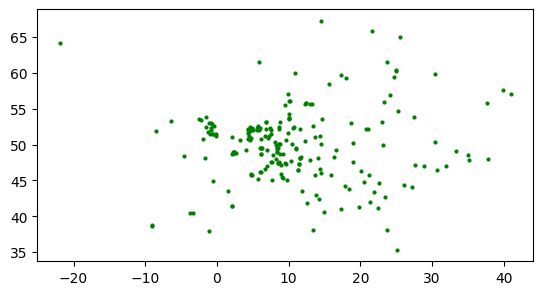

In [62]:
epsilon = 7
unclustered_graph = get_graph('/content/drive/MyDrive/DS701/GitHub/homework-1-Arjun09061/probes.csv', '/content/drive/MyDrive/DS701/GitHub/homework-1-Arjun09061/latencies.csv', epsilon)
get_network_plot(unclustered_graph)
plt.show()

### Clustering cities

The objective of this question is to reduce the number of nodes in this graph. Each node represents a location, and we want to cluster locations which are really close (e.g. in the same Metro area). A point of attention here is that: we want to cluster only locations that are **extremely** close. For instance, it is not the goal to have a cluster with Boston and NYC. Instead, we want to have Boston and Cambridge in the same clusters.

You have to find clusters of nodes using their latitude and longitude data. Then, we will use your clustering assignment to represent each cluster by its centroid.

**You are to use at least two algorithms: DBSCAN and K-Means**.

You will work with the latitude and longitude data of each probe location.

In [63]:
nodes = list(unclustered_graph.nodes(data=True))
X = np.array([[data['lat'], data['long']] for _, data in nodes])
X[:10, :]

array([[53.8915, 27.4605],
       [42.6685, 23.3975],
       [44.1195, 27.2595],
       [50.0595, 14.4795],
       [49.2115, 16.6015],
       [47.5015, 19.0385],
       [46.2595, 20.1505],
       [50.2485, 18.9985],
       [52.2315, 21.0005],
       [52.2075, 20.8075]])

**You have to cluster the array ```X```.**

Implement your cluster method below.

**P.S.:** The DBSCAN algorithm assign noise points (points that were not assigned to any cluster) the same label (in this case, -1). We want you to make each noise point a cluster with only one point.

As an example, suppose that you have the following cluster assignment:

```py
cluster_labels = [-1, 1, 1, 2, 2, -1]
```

You have to make each noise point a cluster. Then, you would have:

```py
cluster_labels = [3, 1, 1, 2, 2, 4]
```

#### DBSCAN

Cluster the array ```X``` using DBSCAN.

In [64]:
from sklearn.cluster import DBSCAN

# Define the DBSCAN model with appropriate parameters
eps = 0.6
min_samples = 1  # Minimum number of samples in a neighborhood (1 for noise points)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the data
cluster_labels = dbscan.fit_predict(X)

# Convert noise points to unique clusters
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels)
new_cluster_labels = [label if label != -1 else num_clusters + i for i, label in enumerate(cluster_labels)]

# Print the cluster assignments
print("Cluster Labels with Noise as Unique Clusters:", new_cluster_labels)


Cluster Labels with Noise as Unique Clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31, 32, 30, 31, 33, 34, 35, 36, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 47, 48, 49, 50, 51, 52, 51, 51, 53, 51, 51, 51, 51, 51, 51, 51, 52, 51, 54, 51, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 62, 66, 67, 68, 69, 70, 71, 65, 66, 72, 73, 74, 75, 75, 76, 77, 78, 79, 80, 81, 80, 79, 82, 78, 83, 84, 85, 86, 86, 87, 87, 87, 87, 87, 88, 89, 90, 91, 92, 93, 94, 95, 90, 90, 96, 94, 90, 94, 97, 98, 90, 90, 90, 95, 99, 90, 100, 101, 102, 103, 104, 105, 106, 107, 106, 106, 108, 104, 107, 106, 106, 107, 106, 109, 106, 110, 106, 104, 111, 106, 112, 103, 113, 105, 107, 106, 104, 114, 104, 101, 115, 116, 104, 117, 118, 105, 105, 106, 119, 120, 110, 106, 121, 121, 121, 121, 87, 122, 123, 122, 87, 122, 87, 104, 87, 87, 123, 122, 87, 122, 87, 87, 84, 84, 84, 89, 89, 124, 124, 84, 84, 89, 62, 84]


We have performed hyperparameter optimization to factor in the optimal number of clusters to take into account the locations that are ***extremely*** close together. The optimal hyperparameters are mentioned below.

eps = 0.6

min_samples = 1 (Minimum number of samples in a neighborhood - 1 for noise points)


##### Visualizing your solution

Using the ```graph_from_cluster``` and ```get_network_plot```, plot your DBSAN solution and the original graph (which is in the variable ```unclustered_graph```).

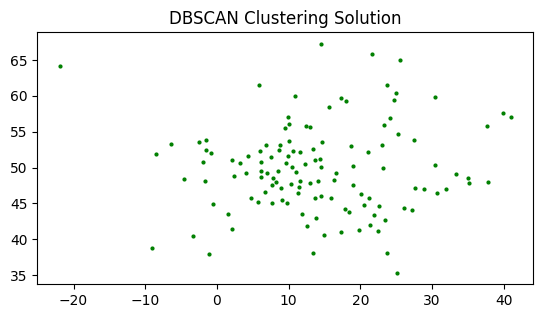

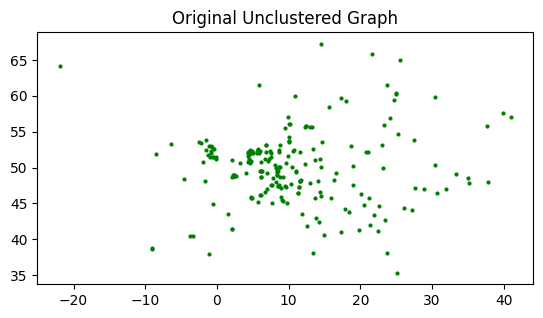

In [65]:
# Create a NetworkX graph from the DBSCAN clustering result
dbscan_graph = graph_from_cluster(unclustered_graph, new_cluster_labels)

# Plot the DBSCAN solution
dbscan_plot = get_network_plot(dbscan_graph)
plt.title("DBSCAN Clustering Solution")
plt.show()

# Plot the original unclustered graph
original_plot = get_network_plot(unclustered_graph)
plt.title("Original Unclustered Graph")
plt.show()


How many cluster did you find?

In [66]:
unique_clusters = np.unique(new_cluster_labels)
num_clusters = len(unique_clusters)
print(f"Number of clusters found: {num_clusters}")


Number of clusters found: 125


Plot the distribution of clusters sizes that you found.

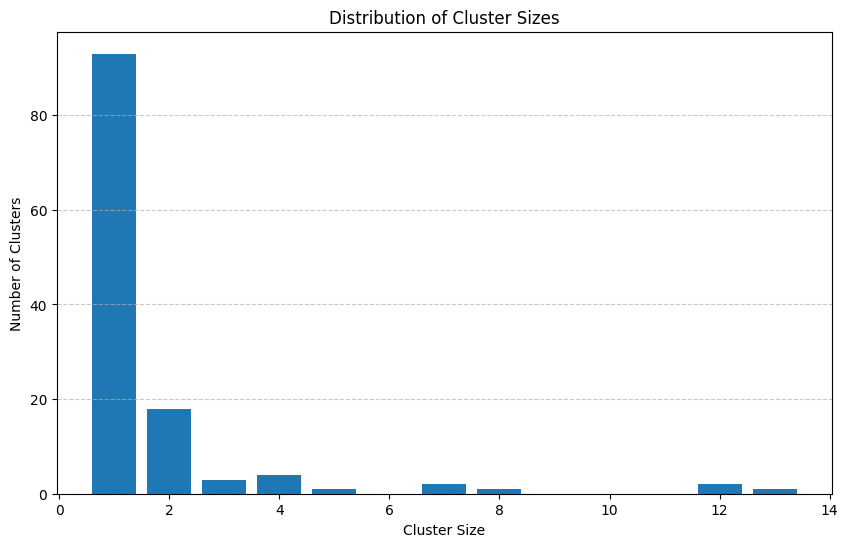

In [67]:
# Count the number of nodes in each cluster
cluster_sizes = [np.sum(new_cluster_labels == label) for label in unique_clusters]

# Create a histogram or bar plot of cluster sizes
plt.figure(figsize=(10, 6))
plt.hist(cluster_sizes, bins=range(1, max(cluster_sizes) + 2), align='left', rwidth=0.8)
plt.xlabel('Cluster Size')
plt.ylabel('Number of Clusters')
plt.title('Distribution of Cluster Sizes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Analyzing the clustering

We stated before that we want only extremely close cities to be in the same clusters. We will now check if your clustering assignment satisfies this requirement.

We are giving you the DataFrame ```cities```, with a pair of cities and countries that represent each node.

The first row of ```cities``` represents the first row of the array ```X``` that you clustered. Then, you can directly use your clustering assignment to identify cities that are in the same cluster.

In [68]:
cities = pd.DataFrame(np.array([[data['city'], data['country']] for _, data in nodes]), columns=["city", "country"])
cities

,city,country
0,Minsk,Belarus
1,Sofia,Bulgaria
2,Silistra,Bulgaria
3,Prague,Czechia
4,Brno,Czechia
...,...,...
213,Gais,Switzerland
214,Winterthur,Switzerland
215,Geneve,Switzerland
216,Stabio,Switzerland


Compute how many countries are in each cluster. Then, show how many clusters have only one country, how many have only two countries, etc.



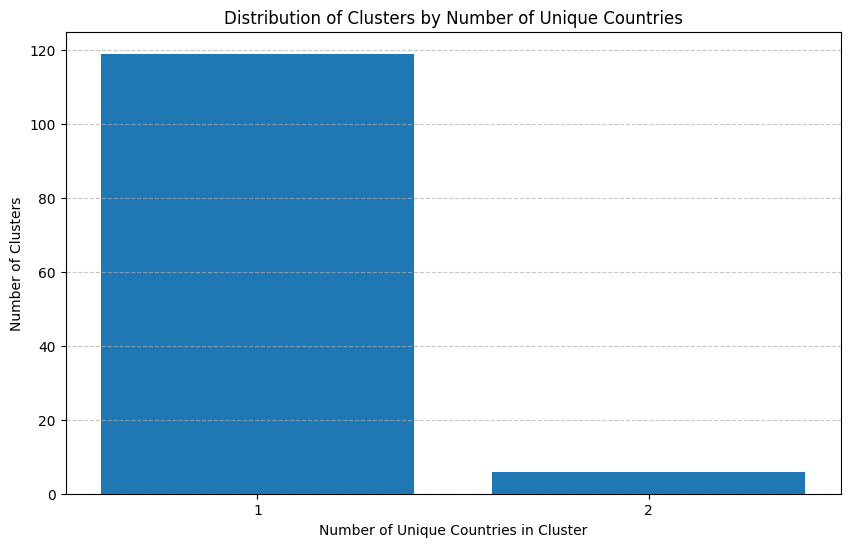

In [69]:
# Create a DataFrame with cluster labels and country information
cluster_df = pd.DataFrame({'Cluster': new_cluster_labels, 'Country': cities['country']})

# Group data by Cluster and count unique countries in each cluster
cluster_country_counts = cluster_df.groupby('Cluster')['Country'].nunique()

# Create a histogram or bar plot of cluster sizes
plt.figure(figsize=(10, 6))
plt.hist(cluster_country_counts, bins=range(1, max(cluster_country_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Unique Countries in Cluster')
plt.xticks([1, 2])
plt.ylabel('Number of Clusters')
plt.title('Distribution of Clusters by Number of Unique Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [70]:
# Merge the cities DataFrame with the cluster labels
clustered_cities = pd.concat([cities, pd.Series(new_cluster_labels, name='Cluster')], axis=1)

# Group data by Cluster and count unique countries in each cluster
cluster_country_counts = clustered_cities.groupby('Cluster')['country'].nunique()

# Count the occurrences of unique country counts
unique_country_counts = cluster_country_counts.value_counts().sort_index()

# Print the results
cluster_country_counts_df = cluster_country_counts.reset_index()
cluster_country_counts_df.columns = ['Cluster', 'NumCountries']
print("Number of Unique Countries in Each Cluster:")
print(cluster_country_counts_df)

print("\nNumber of Clusters with Specific Numbers of Unique Countries:")
print(unique_country_counts)

Number of Unique Countries in Each Cluster:
     Cluster  NumCountries
0          0             1
1          1             1
2          2             1
3          3             1
4          4             1
..       ...           ...
120      120             1
121      121             1
122      122             1
123      123             1
124      124             1

[125 rows x 2 columns]

Number of Clusters with Specific Numbers of Unique Countries:
1    119
2      6
Name: country, dtype: int64


What is the percentage of clusters that have **only one** country?

In [71]:
# Calculate the number of clusters with only one unique country
clusters_with_one_country = len(cluster_country_counts_df[cluster_country_counts_df['NumCountries'] == 1])

# Calculate the total number of clusters
total_clusters = len(cluster_country_counts_df)

# Calculate the percentage of clusters with only one country
percentage_one_country_clusters = (clusters_with_one_country / total_clusters) * 100

print(f"Percentage of clusters with only one country: {percentage_one_country_clusters:.2f}%")


Percentage of clusters with only one country: 95.20%


Select the cluster with the highest number of countries and print its cities and respective countries (if there is more than one, select any).

In [72]:
# Find the cluster label with the highest number of unique countries
cluster_with_highest_countries = cluster_country_counts_df[cluster_country_counts_df['NumCountries'] == cluster_country_counts_df['NumCountries'].max()]

# Get the cluster label
cluster_label = cluster_with_highest_countries.index[0]

# Find the cities and countries in the selected cluster
cities_in_cluster = cities[new_cluster_labels == cluster_label]

# Print the cities and respective countries
for index, row in cities_in_cluster.iterrows():
    print(f"City: {row['city']}, Country: {row['country']}")


City: Milan, Country: Italy
City: ROZZANO, Country: Italy
City: Stabio, Country: Switzerland


Select one city that is not from the majority country in the cluster selected above. Search this city on Google Maps and check if this city is close to the majority country in the cluster. This is a way to check the quality of the cluster.
**Write below just the city that you selected**.

***Minsk***

#### $K$-means

Cluster the array ```X``` using $K$-means. **Explain how you defined the number of clusters**.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

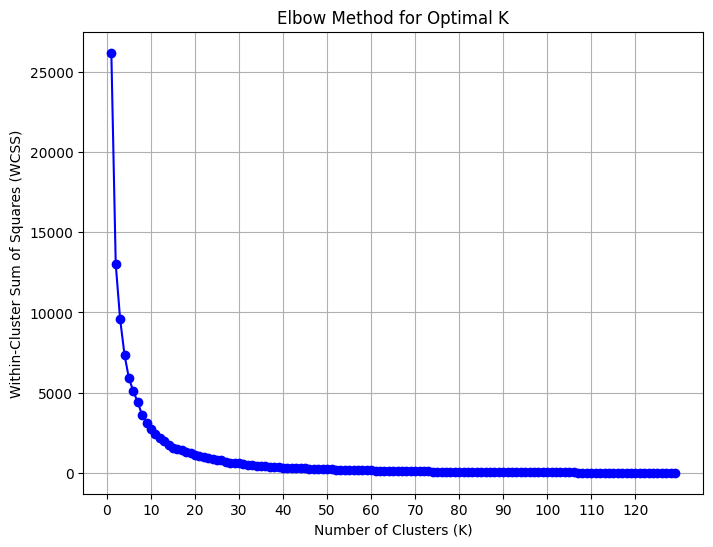

In [73]:
import numpy as np

# Range of K values to try
k_values = range(1, 130)
wcss_values = []

# Calculate WCSS for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

# Plot the elbow curve with x-axis ticks at intervals of 10
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(0, 130, 10))  # Set x-axis ticks at intervals of 10
plt.grid()
plt.show()


Through the elbow method, we can see that we can take 10 as the optimal number of clusters, as at cluster number = 10, it starts to level off.

In [74]:
from sklearn.cluster import KMeans

# Define the number of clusters (K)
num_clusters = 10

# Create a K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to your data (X)
kmeans_labels = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Visualizing your solution

Using the ```graph_from_cluster``` and ```get_network_plot```, plot your $K$-means solution and the original graph (which is in the variable ```unclustered_graph```).

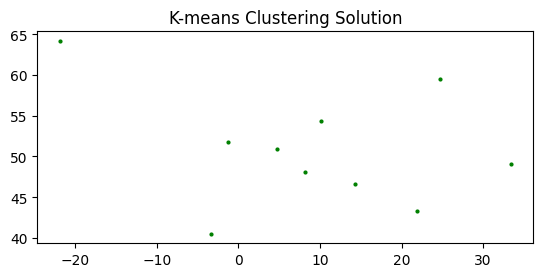

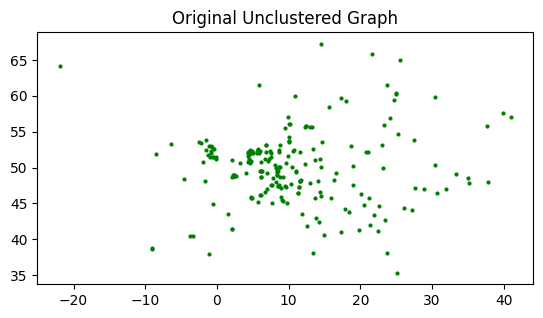

In [75]:
# Create a NetworkX graph from the K-means clustering result
k_means_graph = graph_from_cluster(unclustered_graph, kmeans_labels)

# Plot the DBSCAN solution
k_means_plot = get_network_plot(k_means_graph)
plt.title("K-means Clustering Solution")
plt.show()

# Plot the original unclustered graph
original_plot = get_network_plot(unclustered_graph)
plt.title("Original Unclustered Graph")
plt.show()


Plot the distribution of clusters sizes that you found.

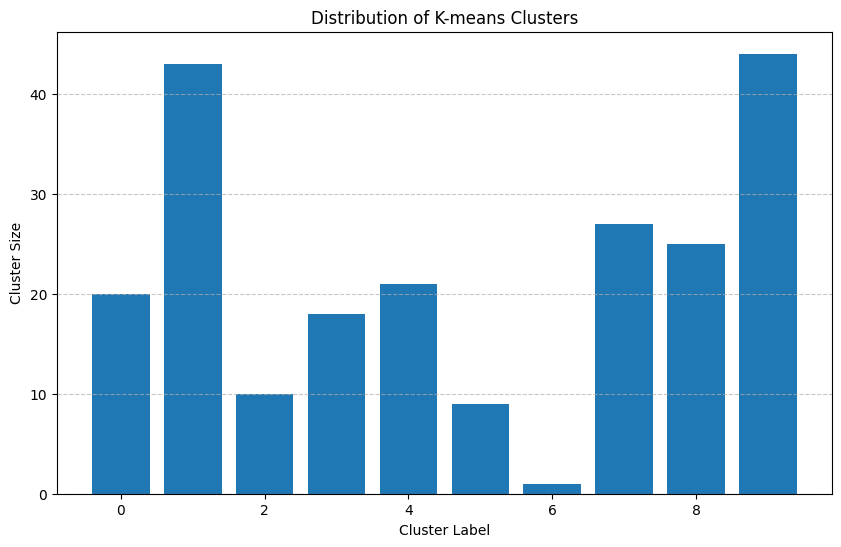

In [76]:
# Calculate unique cluster labels
unique_clusters = np.unique(kmeans_labels)

# Count the number of nodes in each cluster
cluster_sizes = [np.sum(kmeans_labels == label) for label in unique_clusters]

# Create a bar plot of cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(unique_clusters, cluster_sizes)
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.title('Distribution of K-means Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### Analyzing the clustering

We stated before that we want only extremely close cities to be in the same clusters. We will now check if your clustering assignment satisfies this requirement.

Use the same DataFrame ```cities```.

Compute how many countries are in each cluster. Then, show how many clusters have only one country, how many have only two countries, etc.

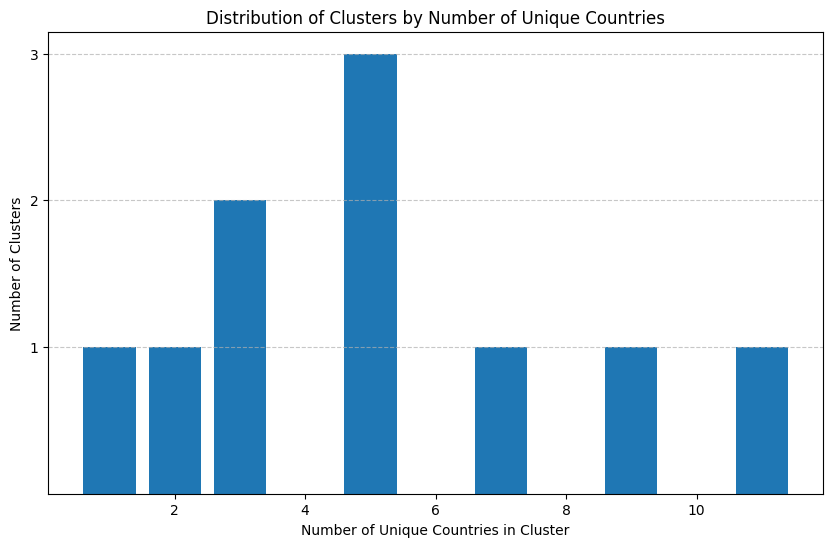

In [77]:
# Create a DataFrame with cluster labels, city, and country information
cluster_df = pd.DataFrame({'Cluster': kmeans_labels, 'City': cities['city'], 'Country': cities['country']})

# Group data by Cluster and count unique countries in each cluster
cluster_country_counts = cluster_df.groupby('Cluster')['Country'].nunique()

# Create a histogram or bar plot of cluster sizes
plt.figure(figsize=(10, 6))
plt.hist(cluster_country_counts, bins=range(1, max(cluster_country_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Unique Countries in Cluster')
plt.ylabel('Number of Clusters')
plt.yticks([1, 2, 3])
plt.title('Distribution of Clusters by Number of Unique Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [78]:
# Calculate and print how many clusters have a specific number of unique countries
unique_country_counts = cluster_country_counts.value_counts().sort_index()
unique_country_counts_df = unique_country_counts.reset_index()
unique_country_counts_df.columns = ['Number of Unique Countries in the Cluster', 'Number of Clusters']
unique_country_counts_df

,Number of Unique Countries in the Cluster,Number of Clusters
0,1,1
1,2,1
2,3,2
3,5,3
4,7,1
5,9,1
6,11,1


There is 1 cluster with 1 unique country, 1 cluster with 2 unique countries, 2 clusters with 3 unique countries and so on.

What is the percentage of clusters that have **only one** country?

In [79]:
# Calculate the number of clusters with only one unique country
clusters_with_one_country = unique_country_counts_df[unique_country_counts_df['Number of Unique Countries in the Cluster'] == 1]['Number of Clusters'].sum()

# Calculate the total number of clusters
total_clusters = unique_country_counts_df['Number of Clusters'].sum()

# Calculate the percentage of clusters with only one country
percentage_one_country_clusters = (clusters_with_one_country / total_clusters) * 100

print(f"Percentage of clusters with only one country: {percentage_one_country_clusters:.2f}%")


Percentage of clusters with only one country: 10.00%


Select the cluster with the highest number of countries and print its cities and respective countries (if there is more than one, select any).

In [80]:
# Find the cluster label with the highest number of unique countries
cluster_with_highest_countries = cluster_country_counts.idxmax()

# Filter the DataFrame to include only nodes in the cluster with the highest number of countries
cluster_nodes = cluster_df[cluster_df['Cluster'] == cluster_with_highest_countries]

# Print the cities and respective countries in the cluster
cluster_nodes

,Cluster,City,Country
1,0,Sofia,Bulgaria
2,0,Silistra,Bulgaria
5,0,Budapest,Hungary
6,0,Szeged,Hungary
13,0,Chisinau,Republic of Moldova
14,0,Bucharest,Romania
15,0,Iasi,Romania
16,0,Timisoara,Romania
17,0,Drobeta-Turnu Severin,Romania
28,0,Chervonograd,Ukraine


Select one city that is not from the majority country in the cluster. Search this city on Google Maps and check if this city is close to the majority country in the cluster. This is a way to check the quality of the cluster.
**Write below just the city that you selected**.

***Geneve***

### Questions

1) Cite **two** diferences between $K$-means and DBSCAN algorithms.

The two key differences between the $K$-means and DBSCAN algorithms:

***Clustering Approach***:

***K-means:*** It is a centroid-based clustering algorithm. K-means aims to partition the data into a pre-determined number of clusters (K) by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the mean of the data points in each cluster. It assumes that clusters are spherical and equally sized.

***DBSCAN (Density-Based Spatial Clustering of Applications with Noise):*** DBSCAN is a density-based clustering algorithm. It defines clusters as dense regions of data points separated by areas of lower point density. It doesn't require specifying the number of clusters in advance and can discover clusters of arbitrary shapes. It can also identify noise points that don't belong to any cluster.


***Cluster Shape and Size:***

***K-means:*** K-means assumes that clusters are spherical and have roughly the same size. It is sensitive to the initial placement of cluster centroids, and the final result can be different based on the initial centroids.

***DBSCAN:*** DBSCAN can find clusters of arbitrary shapes and sizes. It can identify clusters that are irregularly shaped and doesn't assume that clusters have the same density. DBSCAN is robust to outliers and can distinguish noise points from clusters.
These differences make K-means suitable for situations where the data has well-defined spherical clusters, and the number of clusters is known in advance. On the other hand, DBSCAN is useful when dealing with complex data where clusters may have varying shapes, sizes, and densities, and when you want the algorithm to automatically determine the number of clusters.




